In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

**Goal**: Compare Loss and weight of SGDClassifier with log loss and our model using numpy

So first we create a dataset with binary classification. Then we use it on SGDClassifier and print the loss after epoch and then the final weight vector and bias.

## Dataset

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

 ## SGDClassifier with Log Loss

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float  lambda
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

The learning rate (eta0) = 0.0001
lamda/alpha = 0.0001

The learning rate is also kept constant i.e. it wont change with each time the weight are optimized.

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.15 seconds.
Convergence after 6 epochs took 0.15 seconds


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.41177431,  0.18416782, -0.13895073,  0.33572511, -0.18423237,
          0.5494352 , -0.45213692, -0.08857465,  0.21536661,  0.17351757,
          0.18480827,  0.00443463, -0.07033001,  0.33683181,  0.02004129]]),
 (1, 15),
 array([-0.76181561]))

 ## Our Model

**For better clarity we havent added a column of ones to Xtrain and rather kept the weights vector and bias separate.** 

In [11]:
import random
import math

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [12]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [13]:
pd.DataFrame(data = X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.266454,0.207401,0.207484,-0.491013,-0.700210,-0.294138,0.273313,0.695944,-0.030006,0.006645,0.609432,-1.110552,-0.528438,-0.511179,0.231617
std,2.126825,1.970479,1.874263,1.762062,1.649456,1.723327,2.050374,1.986726,4.385574,2.094178,4.066106,3.406985,2.612897,2.073009,2.525177
min,-8.360184,-8.791185,-7.383914,-7.692214,-7.729431,-7.750905,-8.661642,-7.848835,-23.924167,-8.678568,-17.056269,-18.299831,-13.340440,-8.971211,-12.804785
25%,-1.162846,-1.090813,-1.084520,-1.675401,-1.805095,-1.430182,-1.103160,-0.607170,-2.989116,-1.427887,-1.924670,-3.311911,-2.213970,-1.899357,-1.422223
50%,0.241495,0.235629,0.183688,-0.543458,-0.705345,-0.354602,0.275627,0.705302,0.027739,-0.018822,0.635744,-1.163694,-0.598621,-0.497557,0.196780
75%,1.683281,1.501122,1.461999,0.656996,0.401761,0.784513,1.660565,2.002337,2.912834,1.382269,3.155235,1.049781,1.068512,0.908975,1.822896
max,11.017564,8.879740,8.065992,7.255772,6.487590,7.808481,8.361272,10.323580,19.131734,10.206260,18.604384,15.941515,15.278376,7.844041,14.235675


In [14]:
#reshaping y and weight vector for compatibilty
# adding a 0 at the first position of w as the intial intercept for weight vector. this means w[0] is our intercept
# adding a column of 1s to X. This will work as the compatibility term for our intercept.
# now our eq is from y = w.T*X + b to y = w.T*X . 
# this concept has been taken from Andrew Ng's machine learning course

y = y.reshape(-1,1)

#X = np.hstack((np.ones_like(X[:,0]).reshape(-1,1),X))
w = np.zeros_like(X[0]).reshape(-1,1)
b = 0
np.random.seed(0)
#W = np.random.uniform(0,1,size=(X.shape[1],1))
#b=0.5

eta0  = 0.0001 # learning rate
alpha = 0.0001 # regularizing term i.e. lambda
N = len(y)

In [15]:
#Splitting X,y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [16]:
print(X[0,:])

[ 1.17133535 -1.00849691  0.40726112 -2.05334509 -1.37381592 -2.99724545
  0.7787227   0.87207405 -2.17362041  1.22938588  0.21266735 -2.21599818
 -1.8801447  -0.61688062 -0.68442615]


* All the value of weight vector have been initialized to 0.

In [17]:
print(w.shape)
print(X.shape)
print(y.shape)

(15, 1)
(50000, 15)
(50000, 1)


In [18]:
# Definition of sigmoid function used in Logistic Regression
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [19]:
#the below function provides the probabilistic prediction of a datapoint in X.
def pred(X,w,b):
  prediction = sigmoid(np.dot(X,w)+b)
  for i in range(len(prediction)):
    if prediction[i] == 1.0:
      prediction[i] = sigmoid(36)
  # shape is m * 1
  return(prediction)

In [20]:
# https://www.geeksforgeeks.org/multiplication-two-matrices-single-line-using-numpy-python/
# https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#training
# Below function calculates the cost/loss of a prediction
# alpha is the regularization multiplyer here. i.e. lambda
def cost_func(X,y,w,lamda,b):
  y = y.reshape(-1,1)
  #cost =  sum(np.log(1-np.exp(-y*(np.dot(X,w)))))
  cost = (np.sum(-y*np.log(pred(X,w,b)) - (1-y)*np.log(1-pred(X,w,b))) + np.sum((lamda/2)*w**2))/len(y)
  return cost


In [21]:
train_cost_list = []
test_cost_list = []
train_cost_list.append(cost_func(X_train,y_train,w,alpha,b))
print(train_cost_list) # Avg loss of training set when weight vector is 0s.

[0.69314718055994529]


In [22]:
#for cross-checking
from sklearn.metrics import log_loss

loss = log_loss(y, pred(X,w,b))
loss

0.69314718055994529

$w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t −  α(-y_n + σ((w^{(t)})^{T} x_n+b^{t}))$ 

In [23]:
# derivative of cost function : https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression
# below definition is used to optimize the lambda by subtracting its value for LR* (dJ/dw at w) .
# lr is the learning rate at which we want our w to be optimized
def optimized(X,y,w,lr,lamda,b):
  # grad = y*np.log(pred(X,w)) + (1-y)*np.log(1-pred(X,w)) + alpha*np.dot(w.T,w)
  #def_grad = (np.dot(X.T,(pred(X,w) - y)) + (lamda*2*w))/len(y)
  #w = w - lr*def_grad
  N = len(y)
  #w = (1 - lr*lamda/N)*w + lr*np.dot(X.T,(y-pred(X,w,b)))
  w = w - (lr/N)*(np.dot(X.T,(pred(X,w,b) - y)) + lamda*w)
  b = b - lr*np.sum(pred(X,w,b) - y)/N
  
  return w,b

In [24]:
# since we dont know how many iteration it will take to find the optimized w which will give us the least loss,
# we are using while loop with a stop condition
# condition : when the last two loss values in the train_cost_list are very very close(~0.0000001) then we can stop the loop
# We are using the X_train to optimize the w but we are storing lossvalues of train and test set to compare them.


iter_ = True
w,b = optimized(X_train,y_train,w,0.001,alpha,b)
train_cost_list.append(cost_func(X_train,y_train,w,alpha,b))
test_cost_list.append(cost_func(X_test,y_test,w,alpha,b))
iter_count = 0
while iter_:
  for j in range(len(X_train)):
    w,b = optimized(X_train[j:j+1,:],y_train[j],w,0.0001,alpha,b)

  #row = random.sample(range(len(X_train)),50000)
  #xx = X_train[row,:]
  #yy = y_train[row]
  #w,b = optimized(xx,yy,w,0.05,alpha,b)
 
  tr_cost = cost_func(X_train,y_train,w,alpha,b)
  te_cost = cost_func(X_test,y_test,w,alpha,b)

  train_cost_list.append(tr_cost)
  test_cost_list.append(te_cost)
  iter_count += 1
  if abs(train_cost_list[-1] - train_cost_list[-2]) < 0.0001:
    iter_ = False
  print(train_cost_list[-1])
  print(iter_count)

0.404032239403
1
0.388407965583
2
0.383152713014
3
0.380790776947
4
0.379609356837
5
0.378987019198
6
0.378649671195
7
0.378463586214
8
0.37835973692
9
0.378301288038
10


In [25]:

print(X.shape)
print(w.shape)
#print(b.shape)


(50000, 15)
(15, 1)


In [26]:
w = np.array(w).reshape(-1,1)

In [27]:
print(train_cost_list[-1])
test_cost_list[-1]

0.378301288038


0.38029642263059155

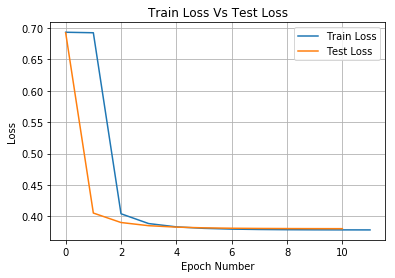

In [28]:
# plotting train and test loss

plt.plot(train_cost_list,label = 'Train Loss')
plt.plot(test_cost_list,label = 'Test Loss')

plt.legend()
plt.xlabel("Epoch Number")
plt.ylabel("Loss")

plt.title("Train Loss Vs Test Loss")
plt.grid()
plt.show()


In [29]:
# the optimized weight vector and the intercept
print('best weight : \n',w)
print('best intercept :',b)


best weight : 
 [[-0.42291962]
 [ 0.19086047]
 [-0.14572511]
 [ 0.33795115]
 [-0.21177796]
 [ 0.56492274]
 [-0.44521243]
 [-0.09166814]
 [ 0.21784835]
 [ 0.16962552]
 [ 0.19510543]
 [ 0.00228425]
 [-0.07775621]
 [ 0.33865727]
 [ 0.02215788]]
best intercept : -0.850007138476


In [30]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.41177431,  0.18416782, -0.13895073,  0.33572511, -0.18423237,
          0.5494352 , -0.45213692, -0.08857465,  0.21536661,  0.17351757,
          0.18480827,  0.00443463, -0.07033001,  0.33683181,  0.02004129]]),
 (1, 15),
 array([-0.76181561]))

* Comparing both the weight vector of my model and of the sklearn model , we can see there isnt much difference between them.

In [31]:
# Avg Accuracy of our prediction
def pred_(w, X):
    N = len(X)
    predict = []
    for i in range(N):
        if pred(X[i],w,b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict).reshape(-1,1)
print(1-np.sum(y_train - pred_(w,X_train))/len(X_train))
print(1-np.sum(y_test  - pred_(w,X_test))/len(X_test))

0.955306666667
0.95288
